# Modeling Major Influential Factors of Medicare Social Media Performance¶

_Author: Natalie Kampf_ 


---

In [1]:
from IPython.display import Image

## Problem Statement

In General, people who are 65 years of age or older who have been legal residents of the United States for at least five years are eligible for Medicare. There is an exception for people with disabilities who are under 65 that may also be eligible if they receive Social Security Disability Insurance (SSDI) benefits. There are also specific medical conditions that would make one eligible for Medicare enrollment. 

Looking specifcally at Medicare Advantage plans, it's important to first understand that Medicare Advantage (Medicare Part C) program gives you another way to get original Medicare Part A and Part B coverage. Private insurance companies approved by Medicare offer Medicare Advantage plans. 

With Medicare advantage enrollment nearly doubling over the last decade, in 2019 there were approximately 22 Million people enrolled in Medicare Advantage plans. Medicare Advantage enrollment is very concentrated in a small number of private companies, which include UnitedHealthcare and Humana together accounting for 44 percent of all Medicare Advantage enrollees nationwide, and the BCBS affiliates (including Anthem BCBS plans) account for another 15 percent of enrollment in 2019. With a competitive landscape for enrolling members in Medicare Advantage plans, it's important to evaluate how you can capture your audience in the most effective way possible. 

In this notebook, I gathered social media data from a Medicare private insurance company during the time referred to as 'Lockout' or 'Age In'. This period is when people are ageing into Medicare or can enroll outside of the annual enrollment period. In this data, the ads were targetted on Facebook to people living in New Jersey who would be captured in the age-in time period from pre-enrollment notifications, enrollment offerings, and final reminders. The adsets are targetted by birth month and when people born in that month would be the ages: 64+6 months, 64 + 9 months, 64+11 months, and 65+1 months. During these times specific messages are run based on what you can do at that age. For the insurance provider's business model, it is important to be able to identify how many leads your campaign will account for, how much you will need to spend to achiebe this and in turn how many enrollments you can predict for the company. 


#### Questions

The questions I would like to ask in this project are what factors determine the amount of leads generated by a social media ad? Which models perform best on the data being collected and used currently to predict the amount of leads a campaign will generate? How well does it predict and how might we better predict leads in the future? If we can answer these questions and find reliable models, the insurance company might be able to better predict how they can allocate funds to generate enough leads. Successful modeling may also yield opportunities for identifying what kind of creative is most effective in regards to leads and media spend. A good model will also be well equipped to predict media spend, which might better inform the insurance company of what is needed to win in the competitive landscape. 

#### Project Details

In my project exploration, there are certain sets of factors that play a role in determining the amount of leads a social media campaign can generate, and there are many more whose impacts cannot be easily articulated or quantified directly (i.e. the amount of ads on any given day, political climate/election years, etc.). In order to understand how major determining factors interact, we will use what the insurance company, and many of it's competitors, use to determine reliable influences on lead generation. In particular we are looking at the lead generation based on what the insurance company qualifies as a digital lead and call lead. The digital lead is qualified by landing page views and actions captured by a pixel and the call leads that are qualified through call tracking metrics, which are populated phone numbers tied to a specific UTM. 


Using what I've discovered, in this project I will obtain and observe approximately 7 months of the following historical data:


---


* The total (web and call) lead generation from an Age-In to Medicare social media Campaign

* The amount of money spent on a given day per ad

* The amount of impressions (views) a given ad receives per day 

* The amount of visits the landing page receives from an ad per day  
    
---  

I will construct and examine a complete dataset of daily data.

Based on the statistical metrics, I chose to evaluate a Linear Regressions model and improve upon it using cross validation and by tuning it's hyperparameters. In the end I will come to conclusions about the efficacy of the model and which factors played the greatest role in successfully predicting/influencing lead generation.


#### Taking a look at Medicare Advantage and the competitive landscape across the US 

<tr>
<td> <img src="./America_Compet.png" alt="Drawing" style="width: 400px;"/> </td>

</tr>

### Context

The data collection took place across the state of New Jersey, which had a 21% Medicare Advantage plan enrollment in 2019, referenced in the map below. Additionally, we can see overall, in the US the enrollment in 2017 was at 19 Million.

<tr>
<td> <img src="./bar.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="./map.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>

## Collecting Data, Cleaning, and Processing

With the collection of data taking place across the State of New Jersey, the data insights were pulled from the Facebook Business platform and the companies digital media agency for phone tracking. 

**Pricing, Generation & Demand**
* All of the data was formatted at based on Daily performance of an Ad Unit and pulled from Facebook Business manager

* Call Lead data was formatted from Daily performance and collected from the call tracking platform
 


**Combining Leads**  

* The total number of leads was formatted in a column to sum up the web leads and call leads 

## Reading in Data

After reading in the data, I took a look at all of the null values to see what data was missing. The variables that had the most null data was visits, Call Leads, Web Leads, and Total Leads. While, the numbers did appear to be quite large in terms of missing data, it made sense due to the fact that capturing a 'lead' and 'visit' require a few more steps in comparison to the impressions variable. I was also not suprised by the amount of missing data due to the fact that this was a daily collection of each ad, and the probabilty of an ad asking someone to buy insurnace on a Facebook Platform generating hundreds of leads is very low. 

With a total of 2,227 entries of collected data, there was a total of 510 total leads collected, which is approximately only 22% of the entries. Recognizing that within the Visits, Call Leads, Web Leads, and Total Leads columns there would be multiple missing values, I filled the values with zero to be able to account for actual leads. 

Additionally, in the formatting of the data there were different numeric values that were being read in as objects rather than floats or ints, so I converted impressions and Media Cost to numeric values while removing an extra symbols and spaces. 


In [2]:
#import core
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
#importing Pandas 
import pandas as pd
pd.options.display.max_columns = None
from functools import reduce
#import display
from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings(action='once')

In [3]:
#setting params for plotting
#rcparams
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [4]:
#load in birthday data set 
birthday_compiled = pd.read_csv('Birthday_compiled.csv')

#looking at the characterisitcs of Birthday_compiled
birthday_compiled.shape

#combining the Web + Call Leads into a column in a new data set called Bday 
birthday_compiled['Total Leads'] = birthday_compiled['Call Leads'] + birthday_compiled['Web Leads']


In [8]:
#re-working the data to not include any objects
bday = birthday_compiled[birthday_compiled.columns[1:]].replace('[\, ]', '', regex=True).astype(object)

In [9]:
bday['Media Cost'] = bday['Media Cost'].str.replace('$', '')

In [10]:
#I discovered the last row of my data was completely blank, so I needed to drop the last row and fill the NAs
bday = bday[:-1]
bday = bday.fillna(0)
#Then I changed the values of Impressions and media Cost to numeric values because they appear as objects
bday["Impressions"] = pd.to_numeric(bday["Impressions"])
bday["Media Cost"] = pd.to_numeric(bday["Media Cost"])

### Additionally I created a dataset with No ID tracking to have only Numerical Values if needed. 

In [11]:
bday_noid = bday.drop(columns = 'Ai_trk')
bday_noid= bday_noid.drop(columns = 'GP Job Name')
bday_noid=bday_noid.drop(columns = 'Day')

___


# EDA & Feature Selection
___


**Quick Stats**  

First taking a look at the summary stats in describe and plotting histograms, we can get a sense for the scale of our units and the distributions in our dataset

In [12]:
bday.describe()

,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
count,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000,2287.000000
mean,389.085265,9.114359,2.179274,0.021425,0.201574,0.223000
std,414.469885,9.668811,2.598749,0.169852,0.762781,0.788775
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.500000,3.055000,0.000000,0.000000,0.000000,0.000000
50%,276.000000,6.980000,1.000000,0.000000,0.000000,0.000000
75%,510.500000,11.830000,3.000000,0.000000,0.000000,0.000000
max,5064.000000,119.830000,20.000000,3.000000,10.000000,10.000000


**Distributions**  

Here we can get a better visual sense of scale and distribution of numeric data. We can see that almost all of the data is heavily right skewed.  

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


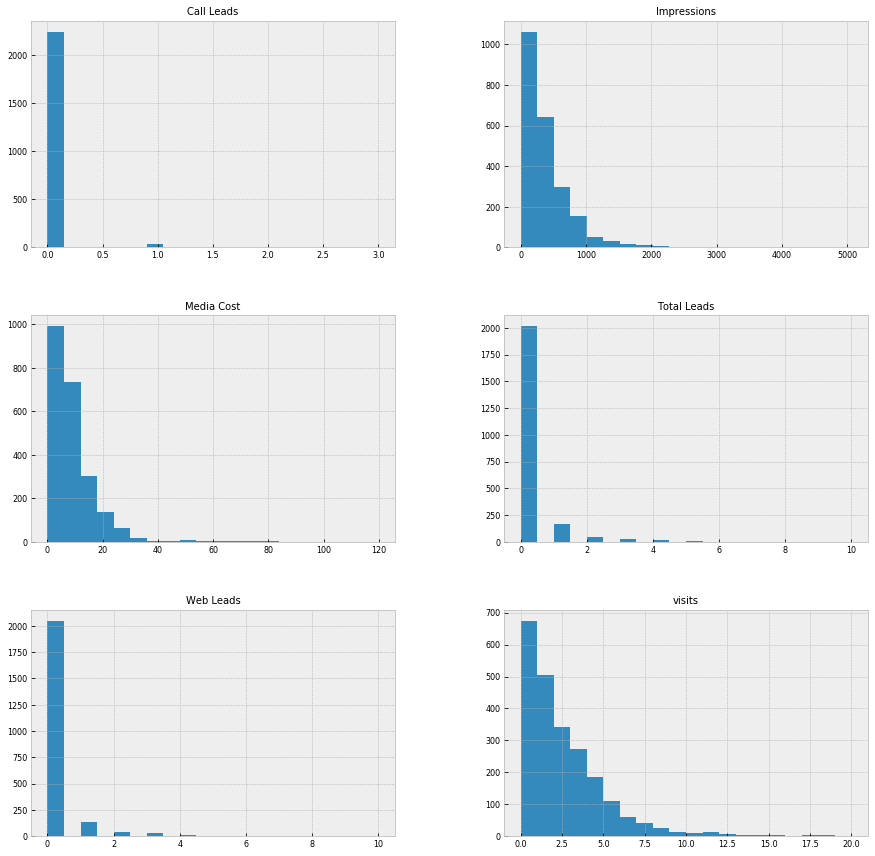

In [13]:
ax3 = bday_noid.hist(figsize=(15,15), bins = 20) 

### Taking a look at taking the log of data to see if it helps the skewness

In [14]:
bday_log = np.log(bday_noid)

/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


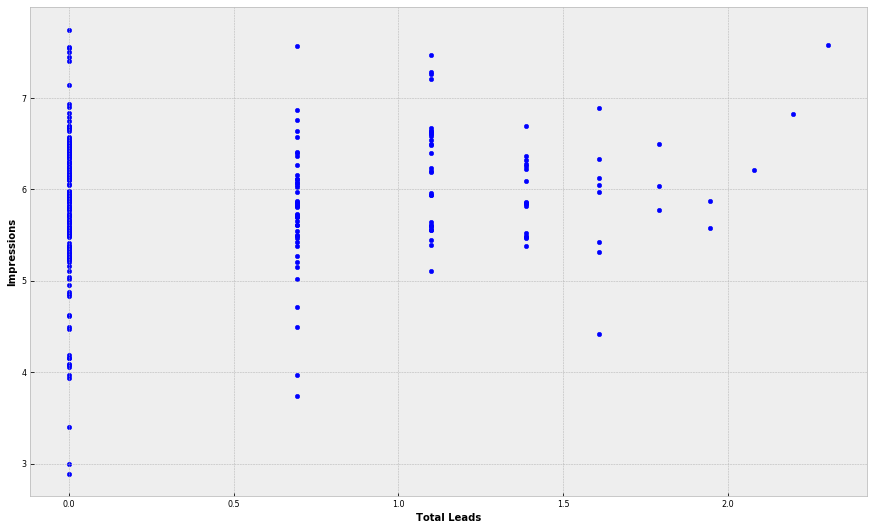

In [13]:
ax = bday_log.plot(kind='scatter', x='Total Leads', y='Impressions');

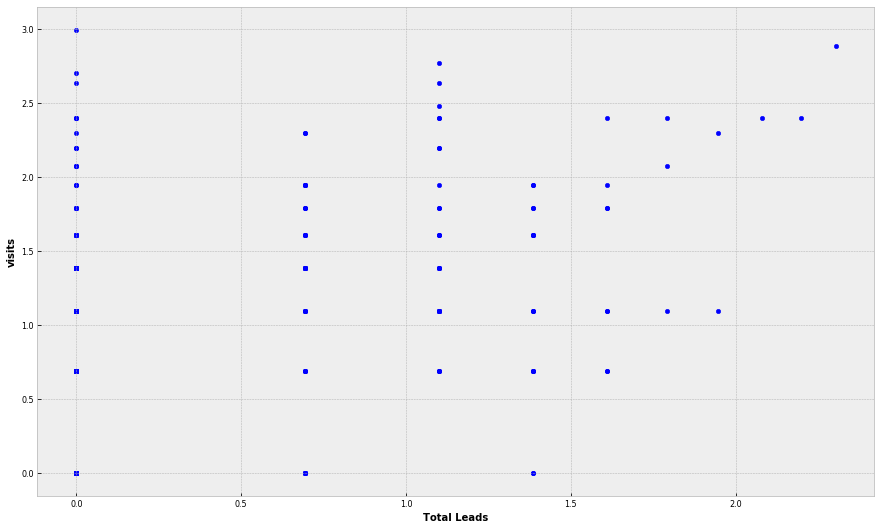

In [14]:
ax = bday_log.plot(kind='scatter', x='Total Leads', y='visits');

## Correlations

Starting out with a limited amount of variables it was important to take a an in-depth look at the correlations that appear among the variables. Let's look at the total leads column, the target data for model:

* The Web leads have the highest correlation to Total Lead, which makes sense due to the fact that web leads and total leads would have collinearity based on how the effect one another. Call Leads has the second strongest correlation to total leads, which was also anticipated due to collineartiy. 

* Impressions has the weakesr positive correlation, which is anticipated based on the amount of impressions and the minimal amount of leads that come from a social media ad. 

* Media costs and visits have the two highest correlation values after call and web leads. This correltion would make sense based on the range of values in total leads compared to Media Spend and Visits. Most visits are quanitified as leads and the media cost is generally calculated on a 'cost per click' model. 

This matrix and reasons above give us the values we will use going forward Impressions, Media Cost, visits, Total Leads, Web Leads, and Call Leads. I will also look into taking the log of the values to see if would help with the skewness

In [15]:
bday_noid.corr()

,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
Impressions,1.000000,0.922197,0.693070,0.055054,0.063937,0.073685
Media Cost,0.922197,1.000000,0.699958,0.061365,0.122820,0.131986
visits,0.693070,0.699958,1.000000,0.115174,0.278133,0.293768
Call Leads,0.055054,0.061365,0.115174,1.000000,0.044308,0.258184
Web Leads,0.063937,0.122820,0.278133,0.044308,1.000000,0.976587
Total Leads,0.073685,0.131986,0.293768,0.258184,0.976587,1.000000


/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


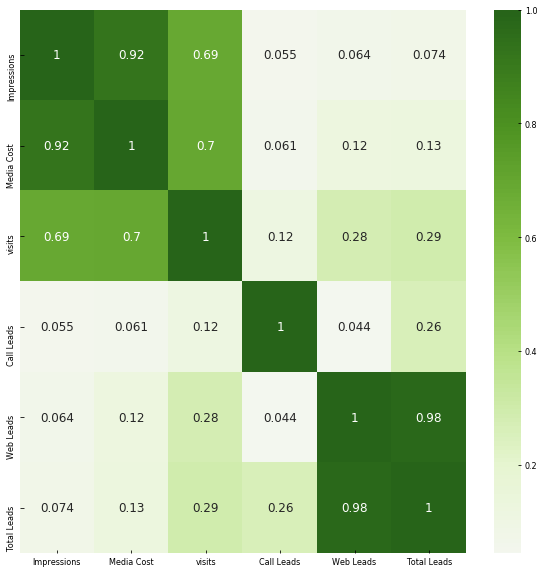

In [16]:
fig, ax4 = plt.subplots(figsize=(10,10))         
sns.heatmap(bday_noid.corr(), center=0, cmap="PiYG", annot = True, ax = ax4);

## Visualizing Data Against Our Target Variable

This is a full glance at the dataset, some things to note here . Outliers will need to be stripped to decrease variance and achieve better performance in our models.  



Text(0.5, 1.0, 'Total Leads Based on Visits')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


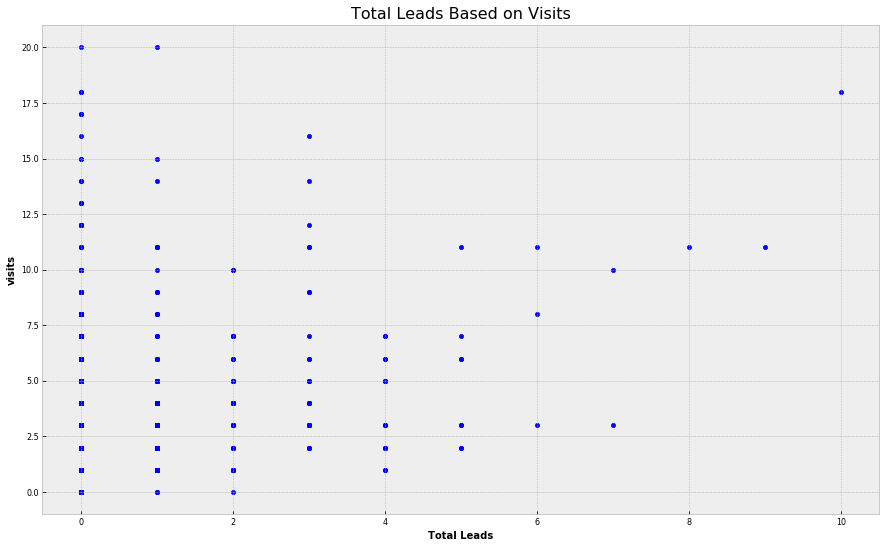

In [17]:
ax1= bday_noid.plot(kind = 'scatter', x = 'Total Leads',  y='visits')
ax1.set_title('Total Leads Based on Visits', fontsize=16)

Text(0.5, 1.0, 'Total Leads Based on Impressions')

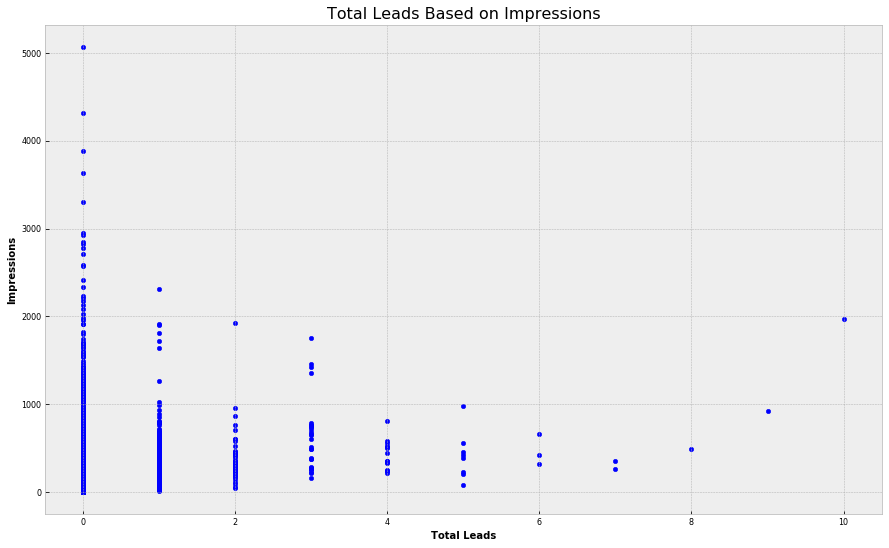

In [18]:
ax2 = bday_noid.plot(kind = 'scatter', x = 'Total Leads', y='Impressions')
ax2.set_title('Total Leads Based on Impressions', fontsize=16)

## Scatter Plots of Features vs. Media Cost

Here we can see our outliers while looking at the variables compared to Media Cost. We can see that variables compared to Media Cost present a linear relationship and inferring from our heatmap, we can infer that most variables are strongly positively correlated to Media Cost 


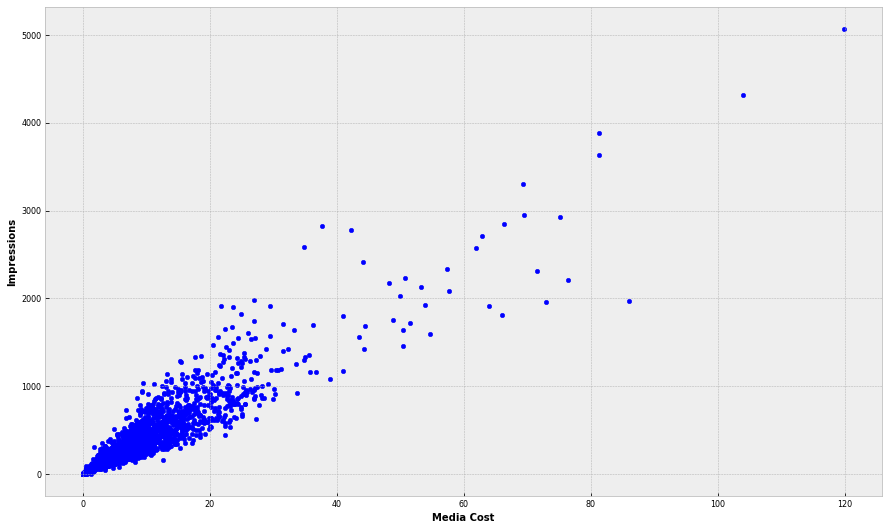

In [19]:
ax = bday_noid.plot(kind='scatter', x='Media Cost', y='Impressions');

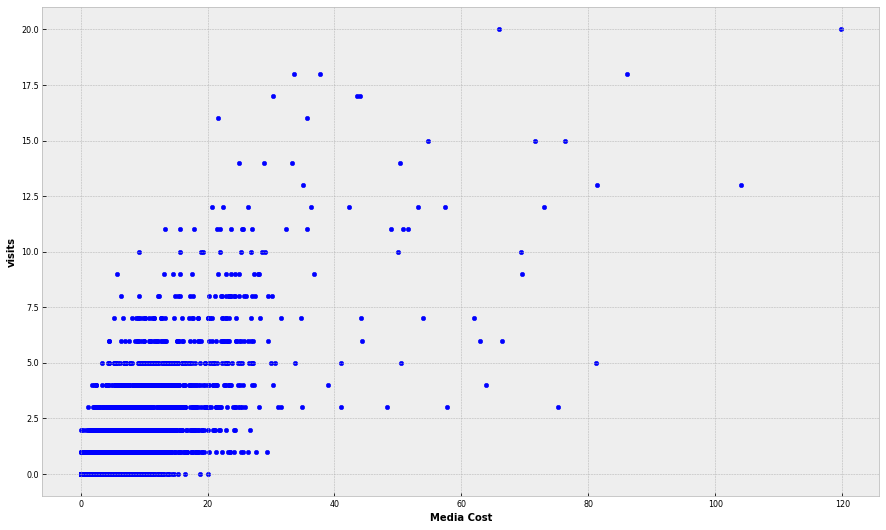

In [20]:
ax = bday_noid.plot(kind='scatter', x='Media Cost', y='visits');

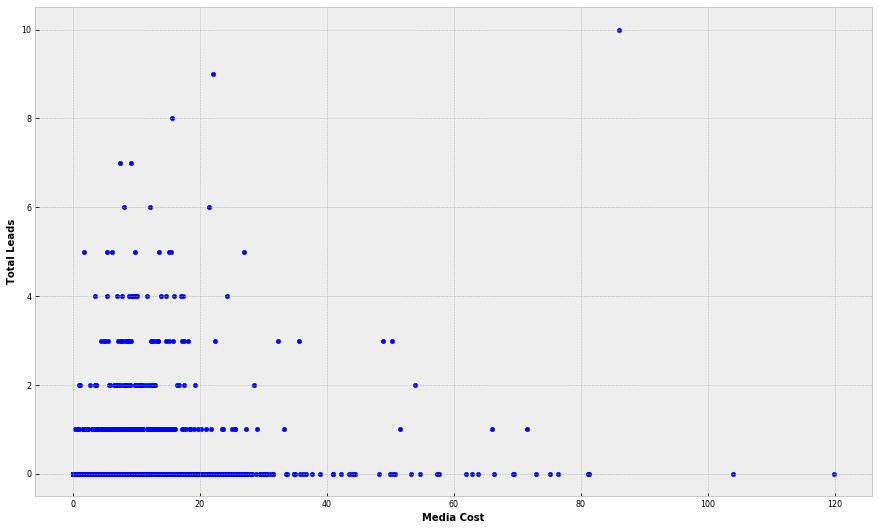

In [21]:
ax = bday_noid.plot(kind='scatter', x='Media Cost', y='Total Leads');

In [22]:
bday.head()

,Day,Ai_trk,GP Job Name,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,18-Jan-19,19SOC-BDA1-C1,Age-InNTMSocialFacebook(64+6mo)FreeGuide,333,5.85,3.0,0.0,0.0,0.0
1,18-Jan-19,19SOC-BDA1-C2,Age-InNTMSocialFacebook(64+6mo)ThreeMonthsAway,340,6.87,3.0,0.0,0.0,0.0
2,18-Jan-19,19SOC-BDA1-C3,Age-InNTMSocialFacebook(64+6mo)Carousel,156,2.15,2.0,0.0,0.0,0.0
3,18-Jan-19,19SOC-BDA2-C3,Age-InNTMSocialFacebook(64+9mo)ImageCarousel,303,6.00,0.0,0.0,0.0,0.0
4,18-Jan-19,19SOC-BDA3-C1,Age-InNTMSocialFacebook(64+11mo)SeeAnyDoctorNa...,177,1.56,0.0,0.0,0.0,0.0


In [23]:
bday_noid.head()

,Impressions,Media Cost,visits,Call Leads,Web Leads,Total Leads
0,333,5.85,3.0,0.0,0.0,0.0
1,340,6.87,3.0,0.0,0.0,0.0
2,156,2.15,2.0,0.0,0.0,0.0
3,303,6.00,0.0,0.0,0.0,0.0
4,177,1.56,0.0,0.0,0.0,0.0


# Testing and Evaluating Models

## Establish Baseline Model



In [15]:
#importing sklearn modules
#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

#model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#scoring
from sklearn import metrics
from scipy import stats

/Users/nataliekampf/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
# Splitting columns into target and features I am running this without web leads to see at first 
# where it stands
target_col='Total Leads'
y = bday.loc[:,target_col]

feature_cols =  'visits', 'Media Cost', 'Impressions'
X = bday.loc[:,feature_cols]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)

from sklearn.linear_model import LinearRegression 
lr= LinearRegression()

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.0610981226496462
0.1518799404097717


In [28]:
# Evaluating the upated Model with web leads added
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.0610981226496462
Training Data R-Squared: 0.1518799404097717
Test Data RMSE: 0.8235762644292387
Test Data MAE: 0.4048846600674943


In [29]:
baseline_err = abs(y_test.mean() - y_test)
print('Average baseline MAE: ', round(np.mean(baseline_err), 2))

Average baseline MAE:  0.44


## Comparing Regression Models  

At this point in our work we have established a baseline modellinear regression.


I would like to compare these models to a Random Forest Regression model, which will take random selections of our features, work down many decision trees and average those predictions. This model seems to be helpful for non-linear machine learning problems, and also does not need to have features normalized in order to make it's predictions.  

Process:  
* Take features and target
* Preprocess and normalize data
* Append model types to a list
* Iterate over models using KFold Cross Validation K=10 Folds
* Evaluate model on whole set, append MAE to scores list
* Append model names and print with mean/std dev of scores
* Compare in boxplot

In [114]:
# normalize the dataset, only normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scl = scaler.fit_transform(X)

#set seed
seed = 23

#instantiate models
models = []
models.append(('LR', LinearRegression()))
models.append(('RDG', Ridge(alpha=0, normalize=True)))
models.append(('ENET', ElasticNet()))
models.append(('RF', RandomForestRegressor(n_estimators = 100)))

#instantiate lists to append to
results = []
names = []
#set scoring parameter
scoring = 'neg_mean_absolute_error'
#iterate over models perform 10 fold cv on each, print mean MAE and Std Devs
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.36396893502652283 (0.05842961111983268)
RDG: -0.36396893502652267 (0.05842961111983272)
ENET: -0.3912240116095208 (0.04864324659225142)
RF: -0.36191241477055086 (0.07358983838342961)


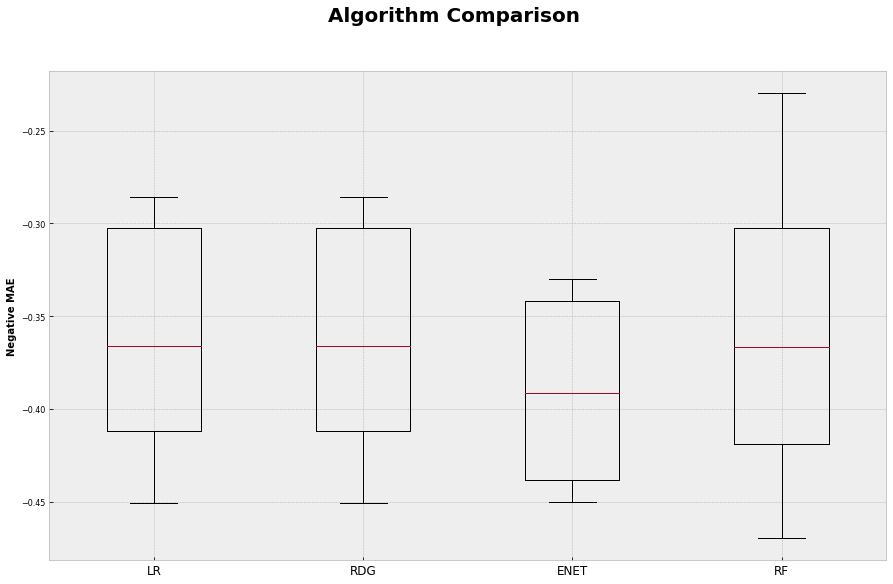

In [115]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison', fontsize = 20, fontweight = 'bold')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize = 12)
ax.set_ylabel("Negative MAE")
plt.show()


#### Results
After testing a few metrics, it became clear the Random Forest model was outperforming the other models on our dataset. For this reason, I chose to explore the Random Forest Regression option, and to try tuning that model in order to access better results on predicting values in our dataset.

## Model w/ Random Forest And Tune Hyperparameters

As I looked into using the Random Forest, I realized I would waant to do something more to see if we could improve upon it. Remembering our results from the EDA, we wanted to remove outliers. The order of the process after selecting the model went as follows:  

**Compare initial run with no feature limitation/preprocessing**
*  Check feature importances based on this model 
* Use this evaluation as our baseline against generalized model and tuned model

**Tune Hyperparamaters to increase performance further, test range of parameters using RandomSearchCV**
* Depth of tree/decisions made at 3
* Kfold split at 10 



**This is the random forest regressor with the data that does not include web leads.** 

In [116]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.8452348801854939
0.056850800252154395


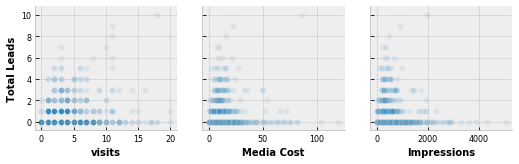

In [117]:
#Taking a look at the target cols against variables 
g = sns.pairplot(bday,
                 x_vars=X.columns,
                 y_vars=target_col,
                 plot_kws={'alpha': .1}
                 )

In [35]:
# Evaluating the upated Model with web leads added
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.0610981226496462
Training Data R-Squared: 0.1518799404097717
Test Data RMSE: 0.8235762644292387
Test Data MAE: 0.4048846600674943


### Go to section: 'Understanding the output' below to see a comparison of the models with different features

In [123]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.8433056854632084
0.060695464603173876


In [120]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

dtr = DecisionTreeRegressor()
kf = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(estimator=dtr,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                    )
grid.fit(X, y)
print(grid.cv_results_['mean_train_score'][0])
print(grid.cv_results_['mean_test_score'][0])

1.0
-1.1917259696616587


/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Adding Webleads Here for feature variables

In [31]:
target_col='Total Leads'
y2 = bday.loc[:,target_col]

feature_cols =  'visits', 'Media Cost', 'Impressions', 'Web Leads'
X2 = bday.loc[:,feature_cols]


In [32]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, shuffle = False)

from sklearn.linear_model import LinearRegression 
lr= LinearRegression()

lr.fit(X2_train, y2_train)
print(lr.score(X2_test, y2_test))
print(lr.score(X2_train, y2_train))

0.9693017280380877
0.9480319113912312


In [33]:
# Evaluating the upated Model with web leads added
print('Test Data R-Squared:', lr.score(X2_test, y2_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X2_train, y2_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X2_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y2_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.9693017280380877
Training Data R-Squared: 0.9480319113912312
Test Data RMSE: 0.14891919592492772
Test Data MAE: 0.045225578709063324


In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X2_train, y2_train)
print(rfr.score(X2_train, y2_train))
print(rfr.score(X2_test, y2_test))

0.9890096059527844
0.950056510536759


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

dtr = DecisionTreeRegressor()
kf = KFold(n_splits=10, shuffle=True)

grid = GridSearchCV(estimator=dtr,
                    param_grid={},
                    return_train_score=True,
                    cv=kf,
                    )
grid.fit(X, y)
print(grid.cv_results_['mean_train_score'][0])
print(grid.cv_results_['mean_test_score'][0])

**Noted that adding back in web leads, significantly improved the model - While understanding that this might be more useful for looking at how many web leads contribute to total leads based on inputs of visits, impressions + media cost**

In [121]:
# Evaluating the upated Model with web leads added
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))  

Test Data R-Squared: 0.0610981226496462
Training Data R-Squared: 0.1518799404097717
Test Data RMSE: 0.8235762644292387
Test Data MAE: 0.4048846600674943


In [70]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X2, y2)
dtr.score(X2, y2)

!conda install -y graphviz

Solving environment: done

# All requested packages already installed.



### Now Looking at the best performing decision Tree 

images_dir = '../'
dotfile_path = f'{images_dir}/bday_tree.dot'
png_path = f'{images_dir}/bday_tree.png'

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(dtr, out_file=dotfile_path, feature_names=X2.columns)

In [73]:
!dot -Tpng {dotfile_path} -o {png_path}

 bday_tree = plt.imread(png_path)
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(bday_tree);

# Understanding the Output

**Initial**

After a train test split and instantiating our model/fitting it to the data, the results did not perform very well, giving an R2 score of 15% accuracy and a root mean squared error  a. The following were our first scores the model had on the test data.

* R2 Score: 0.1518
* Accuracy: 15% 
* MAE:  : 0.405
* RMSE:   0.824
* RFR Score Train: 0.840
* RFR Score Test: 0.069


**Results**  

Based on the outcome of the train test split in the linear regression model I decided to add back in the web leads value to make the model more complex
___

**Second Pass with Added Variable**

After recognizing that web leads were sigficantly correlated to the other variables as a whole, I noted it would be beneficial to add them back into the model. 


* R2 Score: 0.969
* Accuracy: 97% 
* MAE:  : 0.045
* RMSE:   0.15
* RFR Score Train: 0.988
* RFR Score Test: 0.951

**Results**  

After adding back in the additional variable, I was able to improve my model drastically and having an accuracy of 97% 


# Conclusions  

___

## Questions from Problem Statement  

1. What factors have determined lead generation in the past 7 months? 
2. Which models perform best on the data?
3. How well does the model predict and how might we better predict lead generation in the next campaign?
4. Is it feasible to use the findings to associate cost with leads?

### Factors 

The strongest predictors in the model ended up being web leads and second to that was the site visits 


### Which Models Perform Best ?

The original model without web leads incorporated into it performed extremely poorly and therefore I moved the webleads into the model to exponentially increase the models effectiveness and performance. I also looked into taking the log of the data to help with the skewness, however, this did not seem to make much of a difference in the modeling. 

The Model that performed the absolute best was Random Forest with web leads and this was chosen for it's ability to deal with non-linear models more accurately.

### Better Predictions & Limitations  

1. One limitation is usimg Random Forest. It is good at understanding problems in supervised learning, but will not respond well to anything beyond the min/max of it's data.

2. Another limitation is the data itself and the low number of variables in the dataset. It may have helped improved accuracy by including more variables and finding data with less null values. 

2. It would have been interesting to have a dataset froma campaign that has run start to finish and look more closely at the ad performance at an adset level rather than daily intake - to get a better sense of what creative is most effective even though creative is not a predictive variable 

3. In general this is a good start, but I think I would look at the predictive variable being Media Cost in a new model and have leads as a feature variable. I also would want to understand how other factors would influence the media cost and if there is a way to predict that or if it's something that is looked at as an average. 

### General  

I was able to in this project, isolate determining features that give a strong signal to model for lead generation. I was then further able to test various models and select the right one. I think in general this method has given me more insight into how to work with our client and improve social media performance, and though the model isn't necessarily the best, this offers some fundamentals in understanding how to improve results, and how to evaluate what you're doing against a mesh of critiques. I would like to continue furthering the modeling and opening it up a bit more to understand how different variables could improve it. 